# pileup of FP segments to investigate whether there are regions showing overshoot of true segments

In [1]:
import numpy as np
import pandas as pd

path2snp = '/mnt/archgen/users/yilei/tools/ancIBD/empirical/snps_stats_v51.1.hdf5.tsv'

def pileupOverSNP(ibd_df, ch, npairs):
    cms = []
    bps = []

    with open(path2snp) as f:
        for line in f:
            ch_, posBP, posM = line.strip().split()
            ch_, posCM = int(ch_), 100*float(posM)
            if ch_ == ch:
                cms.append(posCM)
                bps.append(int(posBP))
    
    ibdcount = np.zeros(len(bps))
    for index, row in ibd_df.iterrows():
        ibdcount[row['Start']:row['End']+1] += 1
    
    ibdcount /= npairs
    return cms, ibdcount

# 1240k

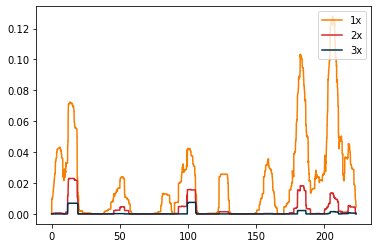

In [5]:
import matplotlib.pyplot as plt

cov2label={'cov1':'1x', 'cov2':'2x', 'cov3':'3x'}
npairs = [13*12/2, 13*12/2, 11*10/2]
colors = ['#f77f00', '#d62828', '#003049']

for cov, color, npair in zip(cov2label.keys(), colors, npairs):
    dfs = []
    for b in np.arange(1,101):
        dfs.append(pd.read_csv(f'./1240k/{cov}/batch{b}/ch3.tsv', sep='\t'))
    data = pd.concat(dfs)
    cms, ibdcount = pileupOverSNP(data, 3, npair)
    ibdcount /= 100
    plt.plot(cms, ibdcount, color=color, label=f'{cov2label[cov]}')

plt.legend(loc='upper right')
plt.savefig('FP.pileup.1240k.png', dpi=300)

# wgs

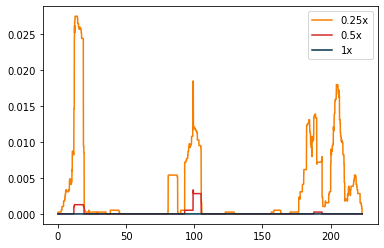

In [8]:
import matplotlib.pyplot as plt

cov2label={'cov1over4':'0.25x', 'cov1over2':'0.5x', 'cov1':'1x'}
npairs = [13*12/2, 13*12/2, 13*12/2]
colors = ['#f77f00', '#d62828', '#003049']

for cov, color, npair in zip(cov2label.keys(), colors, npairs):
    dfs = []
    for b in np.arange(1,51):
        dfs.append(pd.read_csv(f'./wgs/{cov}/batch{b}/ch3.tsv', sep='\t'))
    data = pd.concat(dfs)
    cms, ibdcount = pileupOverSNP(data, 3, npair)
    ibdcount /= 50
    plt.plot(cms, ibdcount, color=color, label=f'{cov2label[cov]}')

plt.legend(loc='upper right')
plt.savefig('FP.pileup.wgs.png', dpi=300)

# pileup over each pair of samples separately

In [4]:
import itertools
import matplotlib.pyplot as plt

cov2label={'cov1over10':'0.1x', 'cov1over4':'0.25x', 'cov1over2':'0.5x'}
npairs = [13*12/2, 13*12/2, 13*12/2]
colors = ['#f77f00', '#d62828', '#003049']
samples = ['I4893', 'I4596', 'I1583', 'I2978', 'I5838', 'I1507', 'I2861', 'I2520', 'I3758', 'I5077', 'I0708', 'I5233', 'I3123']

for pair in itertools.combinations(samples, 2):
    id1, id2 = pair
    maxrate = 0.0
    for cov, color, npair in zip(cov2label.keys(), colors, npairs):
        dfs = []
        for b in np.arange(1,51):
            dfs.append(pd.read_csv(f'./wgs/{cov}/batch{b}/ch3.tsv', sep='\t'))
        data = pd.concat(dfs)
        data = data[((data['iid1'].str.contains(id1))&(data['iid2'].str.contains(id2))) | \
                        ((data['iid1'].str.contains(id2))&(data['iid2'].str.contains(id1)))]
        if cov == 'cov1over4':
            print(f'{id1} - {id2}: {len(data)}')
        cms, ibdcount = pileupOverSNP(data, 3, 1)
        ibdcount /= 50
        maxrate = max(maxrate, np.max(ibdcount))
        plt.plot(cms, ibdcount, color=color, label=f'{cov2label[cov]}')
    plt.legend(loc='upper right')
    plt.title(f'{id1} - {id2}')
    plt.ylim([0, maxrate+0.001])
    plt.savefig(f'./pileup_fig/{id1}_{id2}.png', dpi=300)
    plt.clf()

I4893 - I4596: 1
I4893 - I1583: 2
I4893 - I2978: 1
I4893 - I5838: 0
I4893 - I1507: 23
I4893 - I2861: 2
I4893 - I2520: 1
I4893 - I3758: 4
I4893 - I5077: 27
I4893 - I0708: 0
I4893 - I5233: 0
I4893 - I3123: 0
I4596 - I1583: 0
I4596 - I2978: 0
I4596 - I5838: 0
I4596 - I1507: 22
I4596 - I2861: 0
I4596 - I2520: 0
I4596 - I3758: 0
I4596 - I5077: 0
I4596 - I0708: 5
I4596 - I5233: 64
I4596 - I3123: 0
I1583 - I2978: 1
I1583 - I5838: 1
I1583 - I1507: 0
I1583 - I2861: 0
I1583 - I2520: 5
I1583 - I3758: 37
I1583 - I5077: 3
I1583 - I0708: 2
I1583 - I5233: 39
I1583 - I3123: 0
I2978 - I5838: 0
I2978 - I1507: 0
I2978 - I2861: 5
I2978 - I2520: 3
I2978 - I3758: 0
I2978 - I5077: 0
I2978 - I0708: 8
I2978 - I5233: 4
I2978 - I3123: 0
I5838 - I1507: 6
I5838 - I2861: 2
I5838 - I2520: 0
I5838 - I3758: 0
I5838 - I5077: 14
I5838 - I0708: 7
I5838 - I5233: 0
I5838 - I3123: 0
I1507 - I2861: 0
I1507 - I2520: 2
I1507 - I3758: 0
I1507 - I5077: 0
I1507 - I0708: 0
I1507 - I5233: 33
I1507 - I3123: 0
I2861 - I2520: 3
I2861 

<Figure size 432x288 with 0 Axes>